# Correlation
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Farbod Khodadadi Aski

*SID:* 810102545

The objective of this notebook is to understand the concept of correlation.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
np.random.seed(545)

warnings.filterwarnings("ignore")

## Calculate Correlation
complete `correlation` function that calculate the correlation matrix of a data fram.

**Note:** you are not allowed to use `pandas.core.frame.DataFrame.corr()` method

In [7]:
def correlation(data: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the correlation matrix from a given dataset.

    Args:
        data (pandas.core.frame.DataFrame): The dataset, where each row represents an observation and each column represents a feature.

    Returns:
        correlation_matrix (pandas.core.frame.DataFrame): The correlation matrix.
    """
    ######################  TODO  ########################

    numeric = data.select_dtypes(include=['number'])
    columns = numeric.columns
    n = len(columns)
    
    corr_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    
    for i in range(n):
        for j in range(n):
            x = numeric.iloc[:, i]
            y = numeric.iloc[:, j]
            
            mean_x= x.mean()
            mean_y =y.mean()
            std_x = np.std(x)
            std_y = np.std(y)
            
            cov = ((x - mean_x) * (y - mean_y)).mean()
            
            corr = cov / (std_x * std_y) 
            corr_matrix.iloc[i, j] = corr
    
    return corr_matrix


    ######################  TODO  ########################

In [9]:
######################  TODO  ########################
#example
print(correlation(pd.read_csv("data/energy.csv")))
######################  TODO  ########################

          AEP_MW      Year     Month       Day      Hour
AEP_MW  1.000000 -0.175130 -0.125545 -0.006847  0.419480
Year   -0.175130  1.000000 -0.093532 -0.001892 -0.000165
Month  -0.125545 -0.093532  1.000000  0.010507 -0.000012
Day    -0.006847 -0.001892  0.010507  1.000000 -0.000108
Hour    0.419480 -0.000165 -0.000012 -0.000108  1.000000


### Convert to Datetime and Extract Features

In [11]:
######################  TODO  ########################
df = pd.read_csv("data/energy.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour

df.to_csv('data/energy.csv',index=False)
######################  TODO  ########################

### Plot Energy Usage Over Years

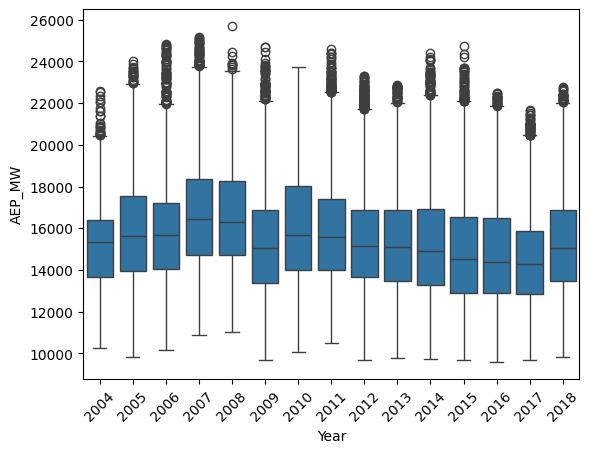

In [23]:
######################  TODO  ########################
sns.boxplot(x='Year',y='AEP_MW' ,data =df)
plt.xticks(rotation=45);
######################  TODO  ########################

### Analyze Energy Usage Over Years

in 2004 the box is shorter suggesting a lower variance between datas than 2005 ,but the median line (the avarage usage) is around the same number.

the calculation below show the same thing about 2004 having lower std and var than 2005:


In [21]:
######################  TODO  ########################
var_2004 = np.var(df.loc[df['Year']== 2004 , 'AEP_MW'])
var_2005 = np.var(df.loc[df['Year']== 2005 , 'AEP_MW'])
std_2004 = np.std(df.loc[df['Year']== 2004 , 'AEP_MW'])
std_2005 = np.std(df.loc[df['Year']== 2005 , 'AEP_MW'])
print(f"variance in 2004 was :{var_2004}")
print(f"variance in 2005 was :{var_2005}")
print(f"std in 2004 was :{std_2004}")
print(f"std in 2005 was :{std_2005}")
######################  TODO  ########################

variance in 2004 was :4310599.722768778
variance in 2005 was :6608761.862442252
std in 2004 was :2076.1983823249593
std in 2005 was :2570.7512253118257


### Plot Energy Usage Over Hours

In the evenings (from 15 to 20) ,we have the most consumption (It's the peak consumption time).

In the early mornings(from 2 to 6) ,we have the least consumption.

std and variance is also lower in the mornings than the evenings.

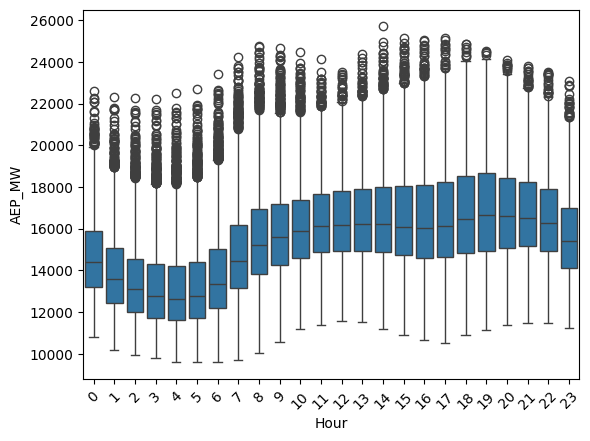

In [22]:
######################  TODO  ########################
sns.boxplot(x='Hour',y='AEP_MW' ,data =df)
plt.xticks(rotation=45);
######################  TODO  ########################

### Plot Energy Usage Over Months

The most consumption are in months 7 and 8 and the least consumption is in months 4 ,5, 10 and 11.(Higher consumption in winter and fall and less consumption in summer and spring)

also the std and variance is higher in months with higher consumption.

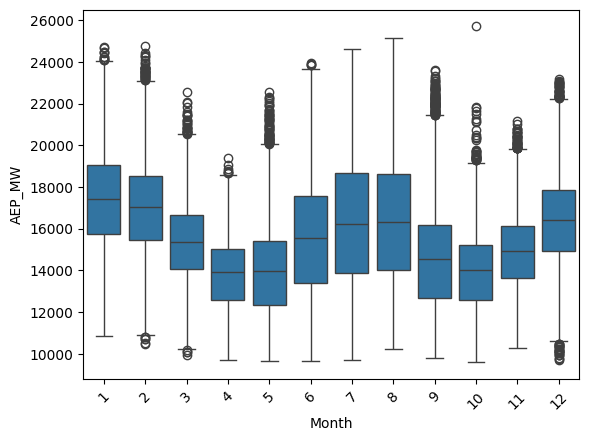

In [24]:
######################  TODO  ########################
sns.boxplot(x='Month',y='AEP_MW' ,data =df)
plt.xticks(rotation=45);
######################  TODO  ########################

### Calculate Correlation Between Specific Hours and Energy Usage

In [39]:
######################  TODO  ########################

######################  TODO  ########################

### Analyze Correlation Between Specific Hours and Energy Usage

TODO

## Causal Effect

## part 9)
We can kind of see the coorelation between some features :

for example Physicaian per 1000 people and Life Expectancy have a correlation coefficient of 0.62 witch is not strong but it shows a positive relation between these 2 ; meanning higher the number of physicians , we can expect higher Life expectency.

On the other hand number of Physicians and number of TVs have a correlation coeffcient of 0.0086 (near zero) which means they dont have a correlation and it is as expected.



In [45]:
######################  TODO  ########################
dataset_9 =pd.read_csv("data/TV_LE_Physician.csv")
print(correlation(dataset_9))
######################  TODO  ########################

                             Life Expectancy (years)  \
Life Expectancy (years)                     1.000000   
Physicians per 1000 people                  0.628805   
Televisions per 1000 people                 0.025875   

                             Physicians per 1000 people  \
Life Expectancy (years)                        0.628805   
Physicians per 1000 people                     1.000000   
Televisions per 1000 people                    0.008602   

                             Televisions per 1000 people  
Life Expectancy (years)                         0.025875  
Physicians per 1000 people                      0.008602  
Televisions per 1000 people                     1.000000  
